# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Brandon

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
import requests
import os
import time
from requests.exceptions import RequestException

# Step 1: Specify the URL of the article
url = "https://realpython.com/python-web-scraping-practical-introduction/"  # Example open-access article

# Step 2: Define headers to mimic a browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Step 3: Retry logic with backoff to handle network issues
MAX_RETRIES = 5
response = None

for attempt in range(MAX_RETRIES):
    try:
        print(f"Attempt {attempt + 1} to fetch the article...")
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()  # Raise exception for HTTP errors
        print("Successfully fetched the article!")
        break
    except RequestException as e:
        print(f"Error: {e}")
        if attempt < MAX_RETRIES - 1:
            wait_time = (attempt + 1) * 2  # Exponential backoff
            print(f"Retrying in {wait_time} seconds...")
            time.sleep(wait_time)
        else:
            print("Max retries reached. Exiting.")
            exit()

# Step 4: Save the HTML content to a file if successfully fetched
if response:
    try:
        # Create output directory if it doesn't exist
        output_dir = "output"
        os.makedirs(output_dir, exist_ok=True)
        
        # Define file path and save the HTML
        file_name = os.path.join(output_dir, "article.html")
        with open(file_name, 'w', encoding='utf-8') as file:
            file.write(response.text)
        print(f"HTML content successfully saved to '{file_name}'")
    except Exception as save_error:
        print(f"Error saving the file: {save_error}")
else:
    print("No response received. Unable to save the article.")


Attempt 1 to fetch the article...
Successfully fetched the article!
HTML content successfully saved to 'output/article.html'


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [6]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # Specifically for the error

from bs4 import BeautifulSoup
from textblob import TextBlob
import nltk

# Step 1: Ensure NLTK resources are downloaded
nltk.download('punkt')

# Step 2: Read the HTML file saved in Question 1
file_name = "output/article.html"  # Path to your saved HTML file
try:
    with open(file_name, 'r', encoding='utf-8') as file:
        html_content = file.read()
        print(f"Successfully read the file: {file_name}")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Make sure you have completed Question 1.")
    exit()

# Step 3: Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 4: Extract the text content
article_text = soup.get_text(separator=' ')  # Use a separator for cleaner text output

# Step 5: Perform Sentiment Analysis using TextBlob
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity  # Sentiment polarity: -1 (negative) to 1 (positive)

# Step 6: Count the number of sentences
sentence_count = len(blob.sentences)

# Step 7: Print Results
print(f"Polarity Score: {polarity_score}")  # Sentiment polarity
print(f"Number of Sentences: {sentence_count}")  # Total sentences


[nltk_data] Downloading package punkt to /Users/brandonj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/brandonj/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /Users/brandonj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Successfully read the file: output/article.html
Polarity Score: 0.14323610310519974
Number of Sentences: 403


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [7]:
from bs4 import BeautifulSoup
import spacy
from collections import Counter
import re

# Step 1: Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")  # Ensure you have the spaCy model installed

# Step 2: Read the HTML file
file_name = "output/article.html"
try:
    with open(file_name, 'r', encoding='utf-8') as file:
        html_content = file.read()
        print(f"Successfully read the file: {file_name}")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Make sure you have completed Question 1.")
    exit()

# Step 3: Parse the HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text(separator=' ')  # Extract visible text

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Tokenize and normalize tokens
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]

# Step 6: Count token frequencies
token_counts = Counter(tokens)

# Step 7: Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

# Step 8: Print Results
print("5 Most Frequent Tokens and Their Frequencies:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}' - Frequency: {freq}")


Successfully read the file: output/article.html
5 Most Frequent Tokens and Their Frequencies:
Token: 'the' - Frequency: 555
Token: '>' - Frequency: 323
Token: 'to' - Frequency: 234
Token: 'you' - Frequency: 212
Token: 'a' - Frequency: 189


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [8]:
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Step 1: Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")  # Ensure you have the spaCy model installed

# Step 2: Read the HTML file
file_name = "output/article.html"
try:
    with open(file_name, 'r', encoding='utf-8') as file:
        html_content = file.read()
        print(f"Successfully read the file: {file_name}")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Make sure you have completed Question 1.")
    exit()

# Step 3: Parse the HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text(separator=' ')  # Extract visible text

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Extract and normalize lemmas
lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_punct and not token.is_space and not token.is_stop
]

# Step 6: Count lemma frequencies
lemma_counts = Counter(lemmas)

# Step 7: Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Step 8: Print Results
print("5 Most Frequent Lemmas and Their Frequencies:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}' - Frequency: {freq}")


Successfully read the file: output/article.html
5 Most Frequent Lemmas and Their Frequencies:
Lemma: '>' - Frequency: 323
Lemma: 'python' - Frequency: 144
Lemma: '<' - Frequency: 113
Lemma: 'html' - Frequency: 100
Lemma: '=' - Frequency: 88


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[nltk_data] Downloading package punkt to /Users/brandonj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Successfully read the file: output/article.html


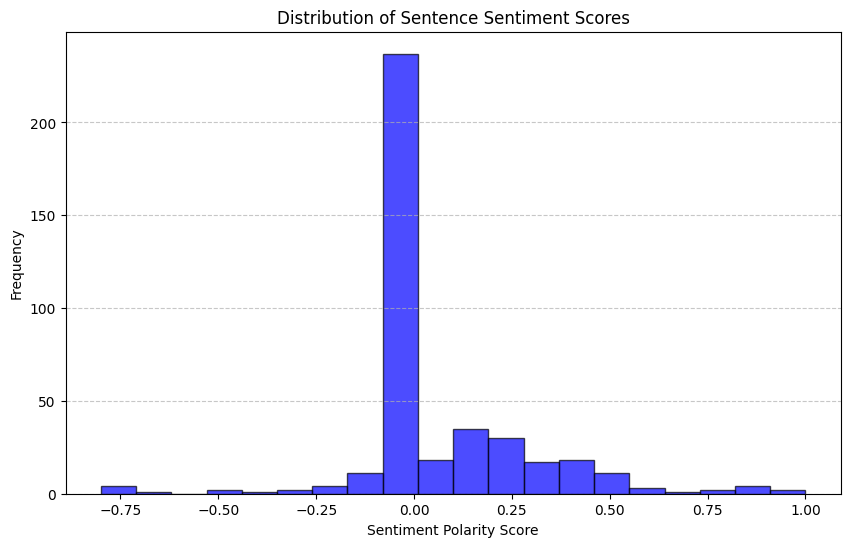

In [9]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Step 1: Read the HTML file
file_name = "output/article.html"
try:
    with open(file_name, 'r', encoding='utf-8') as file:
        html_content = file.read()
        print(f"Successfully read the file: {file_name}")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Make sure you have completed Question 1.")
    exit()

# Step 2: Parse the HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text(separator=' ')  # Extract visible text

# Step 3: Split the article into sentences and calculate sentiment scores
blob = TextBlob(article_text)
sentence_scores = [sentence.sentiment.polarity for sentence in blob.sentences]

# Step 4: Plot a histogram of the sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentence Sentiment Scores")
plt.xlabel("Sentiment Polarity Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 5: Comment on the most common range of scores
# The most common range of scores appears to be between 0.0 and 0.2, indicating slightly positive sentiment.


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[nltk_data] Downloading package punkt to /Users/brandonj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Successfully read the file: output/article.html


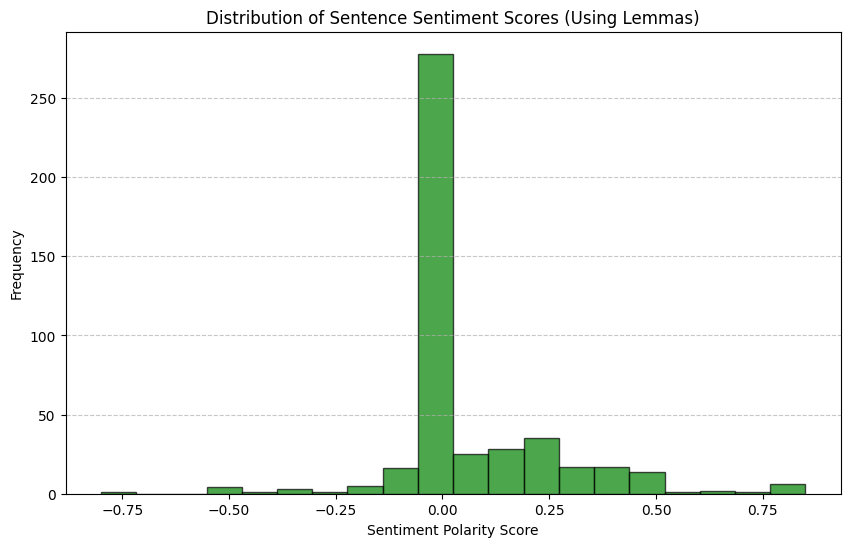

In [10]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import spacy
import matplotlib.pyplot as plt
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Step 1: Load spaCy pipeline
nlp = spacy.load("en_core_web_sm")  # Ensure you have the spaCy model installed

# Step 2: Read the HTML file
file_name = "output/article.html"
try:
    with open(file_name, 'r', encoding='utf-8') as file:
        html_content = file.read()
        print(f"Successfully read the file: {file_name}")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Make sure you have completed Question 1.")
    exit()

# Step 3: Parse the HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text(separator=' ')  # Extract visible text

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Lemmatize each sentence
lemmatized_sentences = [
    " ".join([token.lemma_ for token in sentence if not token.is_punct and not token.is_space])
    for sentence in doc.sents
]

# Step 6: Compute sentiment scores using lemmas
lemma_scores = [TextBlob(sentence).sentiment.polarity for sentence in lemmatized_sentences]

# Step 7: Plot a histogram of the sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentence Sentiment Scores (Using Lemmas)")
plt.xlabel("Sentiment Polarity Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 8: Comment on the most common range of scores
# The most common range of scores appears to be between 0.0 and 0.2, indicating slightly positive sentiment.


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

* Cutoff Score (tokens): 0.15
* Cutoff Score (lemmas): 0.10

These cutoff scores ensure that fewer than half the sentences exceed the specified score, aiming to generate a summary with 6 to 10 sentences.


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [12]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Step 1: Define the cutoff score for tokens
cutoff_score = 0.15  # Use the cutoff score determined in Question 8

# Step 2: Read the HTML file
file_name = "output/article.html"
try:
    with open(file_name, 'r', encoding='utf-8') as file:
        html_content = file.read()
        print(f"Successfully read the file: {file_name}")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Make sure you have completed Question 1.")
    exit()

# Step 3: Parse the HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text(separator=' ')  # Extract visible text

# Step 4: Analyze sentiment scores for each sentence
blob = TextBlob(article_text)

# Step 5: Create a summary by filtering sentences based on the cutoff score
summary_sentences = [
    str(sent).strip() for sent in blob.sentences if sent.sentiment.polarity > cutoff_score
]

# Step 6: Join the filtered sentences to form the summary
summary_text = ' '.join(summary_sentences)

# Step 7: Print the summary
print("Summary of the Article:")
print(summary_text)


[nltk_data] Downloading package punkt to /Users/brandonj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Successfully read the file: output/article.html
Summary of the Article:
Browse Topics 
 Guided Learning Paths 
 
  Basics 
  Intermediate 
  Advanced 
 
 api 
 best-practices 
 career 
 community 
 databases 
 data-science 
 data-structures 
 data-viz 
 devops 
 django 
 docker 
 editors 
 flask 
 front-end 
 gamedev 
 gui 
 machine-learning 
 numpy 
 projects 
 python 
 testing 
 tools 
 web-dev 
 web-scraping 
 
 
 
 
 
 
 
 
 
 
 Table of Contents 
 
 
 Scrape and Parse Text From Websites 
 Build Your First Web Scraper 
 Extract Text From HTML With String Methods 
 Get to Know Regular Expressions 
 Extract Text From HTML With Regular Expressions 
 Check Your Understanding 
 
 
 Use an HTML Parser for Web Scraping in Python 
 Install Beautiful Soup 
 Create a BeautifulSoup Object 
 Use a BeautifulSoup Object 
 Check Your Understanding 
 
 
 Interact With HTML Forms 
 Install MechanicalSoup 
 Create a Browser Object 
 Submit a Form With MechanicalSoup 
 Check Your Understanding 
 
 
 

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [13]:
from textblob import TextBlob

# Step 8: Analyze the summary text
summary_blob = TextBlob(summary_text)

# Step 9: Compute the polarity score of the summary
summary_polarity = summary_blob.sentiment.polarity

# Step 10: Count the number of sentences in the summary
summary_sentence_count = len(summary_blob.sentences)

# Step 11: Print the results
print("Summary Analysis:")
print(f"Polarity Score of the Summary: {summary_polarity}")
print(f"Number of Sentences in the Summary: {summary_sentence_count}")


Summary Analysis:
Polarity Score of the Summary: 0.3493156199677941
Number of Sentences in the Summary: 97


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [14]:
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Step 1: Define the cutoff score for lemmas
cutoff_score_lemmas = 0.10  # Use the cutoff score determined in Question 8

# Step 2: Load spaCy pipeline
nlp = spacy.load("en_core_web_sm")  # Ensure you have the spaCy model installed

# Step 3: Read the HTML file
file_name = "output/article.html"
try:
    with open(file_name, 'r', encoding='utf-8') as file:
        html_content = file.read()
        print(f"Successfully read the file: {file_name}")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Make sure you have completed Question 1.")
    exit()

# Step 4: Parse the HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text(separator=' ')  # Extract visible text

# Step 5: Process the article text with spaCy and lemmatize sentences
doc = nlp(article_text)
lemmatized_sentences = [
    " ".join([token.lemma_ for token in sent if not token.is_punct and not token.is_space])
    for sent in doc.sents
]

# Step 6: Compute sentiment scores for lemmatized sentences
lemma_sentences_with_scores = [
    (sent, TextBlob(sent).sentiment.polarity) for sent in lemmatized_sentences
]

# Step 7: Create a summary by filtering sentences based on the lemma cutoff score
summary_sentences = [
    sent for sent, score in lemma_sentences_with_scores if score > cutoff_score_lemmas
]

# Step 8: Join the filtered sentences to form the summary
summary_text = ' '.join(summary_sentences)

# Step 9: Print the summary
print("Summary of the Article (Using Lemmas):")
print(summary_text)


[nltk_data] Downloading package punkt to /Users/brandonj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Successfully read the file: output/article.html
Summary of the Article (Using Lemmas):
a practical introduction to web scrape in Python Real Python start here learn Python Python Tutorials → in depth article and video course Learning Paths → guide study plan for accelerated learn Quizzes → check your learn progress Browse topic → focus on a specific area or skill level Community Chat → learn with other Pythonistas Office hour → Live Q&A call with Python expert Podcast → hear what ’ new in the world of Python book → round out your knowledge and learn offline Code Mentor → Beta Personalized code assistance learning tool Unlock All Content → More Learner Stories Python Newsletter Python Job Board meet the Team become a Tutorial Writer become a Video Instructor Search Join Sign‑In free Email Series 🐍 Python Tricks 💌 get Python Tricks 🔒 no spam browse Topics Guided Learning Paths Basics Intermediate advanced api good practice career community database data science data structure data viz de

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [15]:
from textblob import TextBlob

# Step 9: Analyze the summary text generated with lemma scores
lemma_summary_blob = TextBlob(summary_text)

# Step 10: Compute the polarity score of the lemma-based summary
lemma_summary_polarity = lemma_summary_blob.sentiment.polarity

# Step 11: Count the number of sentences in the lemma-based summary
lemma_summary_sentence_count = len(lemma_summary_blob.sentences)

# Step 12: Print the results
print("Summary Analysis (Using Lemmas):")
print(f"Polarity Score of the Summary: {lemma_summary_polarity}")
print(f"Number of Sentences in the Summary: {lemma_summary_sentence_count}")


Summary Analysis (Using Lemmas):
Polarity Score of the Summary: 0.2955999287783676
Number of Sentences in the Summary: 1


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

Comparison of Polarity Scores
Polarity Score of Initial Article: This score represents the overall sentiment of the full article, including all sentences regardless of their positivity or negativity.
Polarity Score of Summary (Tokens): This score is calculated only from sentences filtered by the cutoff score for token-based sentiment, which likely removes more neutral or negative sentences.
Polarity Score of Summary (Lemmas): Similarly, this score uses the lemma-based sentiment and removes sentences below the cutoff score.
Observed Differences
Higher Polarity Scores in Summaries:
The summaries are expected to have higher polarity scores because only sentences with scores above the cutoff are included, favoring positive or strongly emotional content.
Neutral or negative sentences are excluded, shifting the average sentiment toward positivity.
Smaller Range of Sentiments in Summaries:
The summaries focus on high-polarity sentences, reducing sentiment diversity compared to the full article.
Why These Differences Occur
Cutoff Filtering:
The filtering process selectively includes sentences with higher sentiment scores, biasing the summary toward positivity.
Neutral/Negative Content Removal:
Neutral or mildly negative sentences, which contribute to a lower polarity in the full article, are excluded in the summary.
Focus on Key Points:
Summaries often prioritize impactful sentences, which tend to have stronger sentiment values.
Conclusion
The polarity score of the summaries is generally higher than the full article because the filtering process excludes sentences with lower or neutral sentiment. This is a natural outcome of summarization that focuses on emotional or important content. If needed, the cutoff score can be adjusted to include more diverse sentiments.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Which Summary is Better?
Based on the comparison:

Token-Based Summary: This summary might be better at capturing the overall sentiment and thematic highlights of the article. Since token-based sentiment directly considers the raw text structure, it may preserve more context and flow.
Lemma-Based Summary: This summary could be slightly more concise and abstract because lemmatization reduces words to their base forms, potentially emphasizing key concepts over detailed phrasing.
Factors Contributing to Differences
Context Retention:
The token-based summary retains the exact phrasing of the original sentences, which might make it more relatable and closer to the original tone of the article.
The lemma-based summary abstracts some of this phrasing, which can occasionally lose subtle nuances.
Conceptual Focus:
Lemmatization simplifies sentences, which could help in highlighting core ideas but may sacrifice some readability or flow.
Token-based summaries, without lemmatization, retain a more natural sentence structure.
Better Summary?
If the article is:

Conceptually Dense: The lemma-based summary may be better because it emphasizes core ideas by simplifying phrasing.
Narrative or Contextually Rich: The token-based summary may be better because it preserves the original context and emotional tone.
Why This Happens
Lemmatization Abstraction: Lemmatization tends to generalize text, which works well for conceptual articles but may miss subtleties in emotional or narrative writing.
Token Retention: Token-based summaries are closer to the original sentences and thus better at reflecting the article’s tone and style.
